In [ ]:
! pip install torch accelerate imblearn transformers nltk pandas numpy matplotlib seaborn wordcloud tk

In [2]:
import os

csv= 'WELFake_Dataset.csv'

if os.path.exists(csv):
    os.remove(csv)
    print(f"{csv} has been deleted.")
else:
    print(f"{csv} does not exist.")


    
! unzip WELFake_Dataset.csv.zip


WELFake_Dataset.csv does not exist.
Archive:  WELFake_Dataset.csv.zip
  inflating: WELFake_Dataset.csv     


In [1]:
import os

csv= 'OnionOrNot.csv'

if os.path.exists(csv):
    os.remove(csv)
    print(f"{csv} has been deleted.")
else:
    print(f"{csv} does not exist.")


    
! unzip OnionOrNot.zip

OnionOrNot.csv does not exist.
Archive:  OnionOrNot.zip
  inflating: OnionOrNot.csv          


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd

df = pd.read_csv("WELFake_Dataset.csv")
df = df[['title', 'label']]
df.head()

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,NaN,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1


In [3]:
df.isnull().sum()

title    558
label      0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

title    0
label    0
dtype: int64

In [2]:
import pandas as pd

onion_df = pd.read_csv("OnionOrNot.csv")
onion_df = onion_df.rename(columns={'text': 'title'})
onion_df.head()


,title,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [3]:
# Invert the labels to match larger dataset
onion_df['label'] = onion_df['label'].apply(lambda x: 0 if x == 1 else 1)
onion_df.head()

,title,label
0,Entire Facebook Staff Laughs As Man Tightens P...,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,1
2,Bold Move: Hulu Has Announced That They’re Gon...,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,0
4,"For men looking for great single women, online...",0


In [4]:
onion_df["label"].value_counts()
# 1 = not onion article
# 0 = onion article

label
1    15000
0     9000
Name: count, dtype: int64

In [5]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and labels
X = onion_df.drop("label", axis=1)
y = onion_df["label"]

# Apply random undersampling
rus = RandomUnderSampler()
onion_X_balanced, onion_y_balanced = rus.fit_resample(X, y)

onion_y_balanced.value_counts()

label
0    9000
1    9000
Name: count, dtype: int64

In [9]:
df["label"].value_counts()
# 1 = reliable
# 0 = unreliable

label
1    36548
0    35028
Name: count, dtype: int64

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# Apply random undersampling
rus = RandomUnderSampler()
X_balanced, y_balanced = rus.fit_resample(X, y)

y_balanced.value_counts()



label
0    35028
1    35028
Name: count, dtype: int64

In [11]:
import pandas as pd

# Reconstruct balanced DataFrame with original column names
X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)

# Combine balanced features with balanced labels
balanced_df = pd.concat([X_balanced_df, y_balanced], axis=1)

In [6]:
import pandas as pd

# Reconstruct balanced DataFrame with original column names
onion_X_balanced_df = pd.DataFrame(onion_X_balanced, columns=X.columns)

# Combine balanced features with balanced labels
onion_balanced_df = pd.concat([onion_X_balanced_df, onion_y_balanced], axis=1)

In [14]:
import pandas as pd

# Concatenate the DataFrames vertically
combined_df = pd.concat([onion_balanced_df, balanced_df], ignore_index=True)
combined_df.head()

,title,label
0,Entire Facebook Staff Laughs As Man Tightens P...,0
1,Bold Move: Hulu Has Announced That They’re Gon...,0
2,Despondent Jeff Bezos Realizes He’ll Have To W...,0
3,"For men looking for great single women, online...",0
4,Kim Jong-Un Wonders If Nuclear Threats Distrac...,0


In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define a function to remove stop words and lemmatize text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    return preprocessed_text

# Create a new DataFrame with the same structure as the original one
onion_preprocessed_df = onion_balanced_df.copy()

# Preprocess the "title" column
onion_preprocessed_df["title"] = onion_preprocessed_df["title"].apply(preprocess_text)


In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define a function to remove stop words and lemmatize text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    return preprocessed_text

# Create a new DataFrame with the same structure as the original one
preprocessed_df = combined_df.copy()

# Preprocess the "title" column
preprocessed_df["title"] = preprocessed_df["title"].apply(preprocess_text)


In [17]:
preprocessed_df.head()

,title,label
0,Entire Facebook Staff Laughs Man Tightens Priv...,0
1,Bold Move : Hulu Announced ’ Gon na Go Ahead R...,0
2,Despondent Jeff Bezos Realizes ’ Work 9 Second...,0
3,"men looking great single woman , online dating...",0
4,Kim Jong-Un Wonders Nuclear Threats Distractin...,0


In [18]:
file_path = "preprocessed_data_4.csv"

import os

# Check if the file exists before attempting to delete it
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")




preprocessed_data_4.csv does not exist.


In [24]:
onion_preprocessed_df.to_csv("onion_preprocessed_data.csv", index=False)

In [25]:
preprocessed_df.to_csv(file_path, index=False)

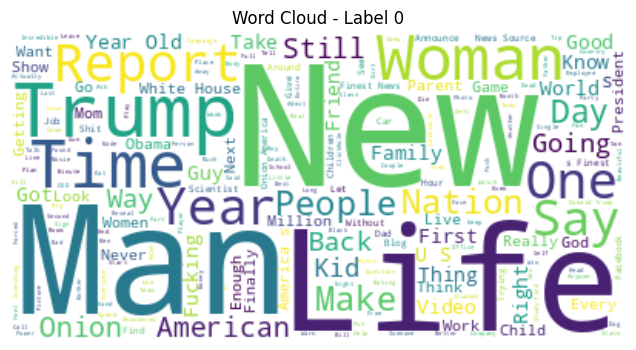

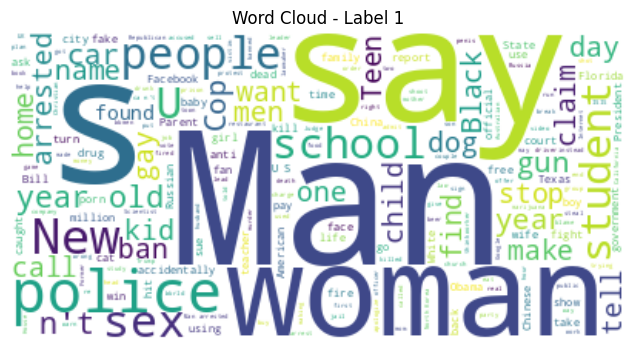

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a given label
def generate_word_cloud(label):
    text_string = " ".join(onion_preprocessed_df[onion_preprocessed_df["label"] == label]["title"])
    wordcloud = WordCloud(width=400, height=200, background_color="white").generate(text_string)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Label {label}")
    plt.show()

# Generate word clouds for labels 0 and 1
generate_word_cloud(0)
generate_word_cloud(1)
